In [1]:
import numpy as np
import pandas as pd                               
import os
import csv
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
import joblib

In [16]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
#Path of dataset
folder1=r"C:\Users\rugve\edi_sem5_new_2class\Activity Recognition Dataset\Chit chat"
# folder2=r"C:\Users\rugve\edi_sem5\Activity Recognition Dataset\Recreation"
folder3=r"C:\Users\rugve\edi_sem5_new_2class\Activity Recognition Dataset\Studying"

In [ ]:
# f"Studying {str(count)}.jpg"

In [3]:
#Applying BRISK Feature descriptor on folder1
i=0
k=0
for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(500,500)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
    # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
    
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
    

    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptor)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
  
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('folder1.csv', mode='a', header=False,index=False)
    k=k+1
#     if k==700:
#         break
    
    

descriptor shape  0  :  (1203, 64)
descriptor shape  1  :  (2343, 64)
descriptor shape  2  :  (965, 64)
descriptor shape  3  :  (1254, 64)
descriptor shape  4  :  (2846, 64)
descriptor shape  5  :  (645, 64)
descriptor shape  6  :  (1591, 64)
descriptor shape  7  :  (520, 64)
descriptor shape  8  :  (616, 64)
descriptor shape  9  :  (1459, 64)
descriptor shape  10  :  (1911, 64)
descriptor shape  11  :  (1303, 64)
descriptor shape  12  :  (2085, 64)
descriptor shape  13  :  (677, 64)
descriptor shape  14  :  (2022, 64)
descriptor shape  15  :  (691, 64)
descriptor shape  16  :  (902, 64)
descriptor shape  17  :  (1055, 64)
descriptor shape  18  :  (1442, 64)
descriptor shape  19  :  (2991, 64)
descriptor shape  20  :  (1787, 64)
descriptor shape  21  :  (847, 64)
descriptor shape  22  :  (2066, 64)
descriptor shape  23  :  (2079, 64)
descriptor shape  24  :  (1537, 64)
descriptor shape  25  :  (2180, 64)
descriptor shape  26  :  (708, 64)
descriptor shape  27  :  (961, 64)
descriptor s

descriptor shape  228  :  (1562, 64)
descriptor shape  229  :  (2404, 64)
descriptor shape  230  :  (843, 64)
descriptor shape  231  :  (1519, 64)
descriptor shape  232  :  (2499, 64)
descriptor shape  233  :  (2561, 64)
descriptor shape  234  :  (1457, 64)
descriptor shape  235  :  (2569, 64)
descriptor shape  236  :  (1842, 64)
descriptor shape  237  :  (2456, 64)
descriptor shape  238  :  (498, 64)
descriptor shape  239  :  (1924, 64)
descriptor shape  240  :  (1466, 64)
descriptor shape  241  :  (1721, 64)
descriptor shape  242  :  (948, 64)
descriptor shape  243  :  (5114, 64)
descriptor shape  244  :  (1004, 64)
descriptor shape  245  :  (1607, 64)
descriptor shape  246  :  (2684, 64)
descriptor shape  247  :  (2354, 64)
descriptor shape  248  :  (2389, 64)
descriptor shape  249  :  (1450, 64)
descriptor shape  250  :  (2062, 64)
descriptor shape  251  :  (2015, 64)
descriptor shape  252  :  (1427, 64)
descriptor shape  253  :  (4116, 64)
descriptor shape  254  :  (1621, 64)
desc

In [4]:
#reading previously saved feature descriptor csv file of folder1 and save it into a dataframe
data1 = pd.read_csv('folder1.csv',header=None,dtype='uint8')

data1=data1.astype(np.uint8) 
data1

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,176,123,207,239,15,0,0,0,0,0,...,2,0,36,211,233,0,0,0,0,0
1,240,27,195,108,96,0,0,0,0,0,...,0,8,6,129,137,235,0,0,0,0
2,128,59,199,233,224,28,0,0,0,0,...,129,203,7,0,153,219,54,0,0,0
3,128,123,207,227,239,13,0,0,0,0,...,0,139,103,16,136,201,126,0,0,0
4,128,59,199,239,7,0,0,0,0,0,...,0,0,0,219,237,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597618,180,72,31,0,0,16,96,112,32,194,...,42,34,221,60,254,255,159,255,31,31
597619,20,0,89,238,175,207,95,0,0,128,...,169,235,251,252,59,8,100,16,80,16
597620,148,3,16,224,238,30,28,64,208,224,...,255,247,121,12,222,99,2,233,125,1
597621,128,3,16,12,230,30,60,80,80,96,...,250,255,255,124,6,154,2,233,48,1


In [5]:
#Applying BRISK Feature descriptor on folder2
i=0
k=0
for filename in os.listdir(folder3):
    
    path=os.path.join(folder3,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(500,500)

    img=cv2.resize(a,resize)
    
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
    # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
    
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(equ, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(equ, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
    

    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptor)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('folder3.csv', mode='a', header=False,index=False)
    k=k+1
#     if k==320:
#         break

descriptor shape  0  :  (675, 64)
descriptor shape  1  :  (510, 64)
descriptor shape  2  :  (1981, 64)
descriptor shape  3  :  (509, 64)
descriptor shape  4  :  (821, 64)
descriptor shape  5  :  (531, 64)
descriptor shape  6  :  (680, 64)
descriptor shape  7  :  (1869, 64)
descriptor shape  8  :  (1122, 64)
descriptor shape  9  :  (1024, 64)
descriptor shape  10  :  (446, 64)
descriptor shape  11  :  (1644, 64)
descriptor shape  12  :  (285, 64)
descriptor shape  13  :  (964, 64)
descriptor shape  14  :  (511, 64)
descriptor shape  15  :  (370, 64)
descriptor shape  16  :  (623, 64)
descriptor shape  17  :  (1297, 64)
descriptor shape  18  :  (1497, 64)
descriptor shape  19  :  (1593, 64)
descriptor shape  20  :  (757, 64)
descriptor shape  21  :  (917, 64)
descriptor shape  22  :  (1051, 64)
descriptor shape  23  :  (917, 64)
descriptor shape  24  :  (596, 64)
descriptor shape  25  :  (867, 64)
descriptor shape  26  :  (1730, 64)
descriptor shape  27  :  (583, 64)
descriptor shape  28

descriptor shape  230  :  (1219, 64)
descriptor shape  231  :  (1109, 64)
descriptor shape  232  :  (1133, 64)
descriptor shape  233  :  (983, 64)
descriptor shape  234  :  (466, 64)
descriptor shape  235  :  (1396, 64)
descriptor shape  236  :  (1228, 64)
descriptor shape  237  :  (916, 64)
descriptor shape  238  :  (672, 64)
descriptor shape  239  :  (1817, 64)
descriptor shape  240  :  (2024, 64)
descriptor shape  241  :  (2609, 64)
descriptor shape  242  :  (582, 64)
descriptor shape  243  :  (888, 64)
descriptor shape  244  :  (1314, 64)
descriptor shape  245  :  (784, 64)
descriptor shape  246  :  (1614, 64)
descriptor shape  247  :  (1485, 64)
descriptor shape  248  :  (1502, 64)
descriptor shape  249  :  (1090, 64)
descriptor shape  250  :  (1267, 64)
descriptor shape  251  :  (1564, 64)
descriptor shape  252  :  (1372, 64)
descriptor shape  253  :  (1556, 64)
descriptor shape  254  :  (1080, 64)
descriptor shape  255  :  (1412, 64)
descriptor shape  256  :  (594, 64)
descripto

In [6]:
#reading previously saved feature descriptor csv file of folder2 and save it into a dataframe
data3= pd.read_csv('folder3.csv',header=None,dtype='uint8')
data3=data3.astype(np.uint8)
data3

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,176,123,207,239,15,0,0,0,0,0,...,0,0,32,211,233,1,0,0,0,0
1,180,123,223,255,239,1,0,0,0,254,...,0,72,38,251,97,0,0,0,0,0
2,176,59,215,229,224,0,0,0,0,0,...,7,0,0,146,219,239,0,0,0,0
3,128,123,15,0,0,192,113,0,0,0,...,156,28,0,2,0,0,0,0,0,0
4,176,59,199,225,238,14,0,0,0,0,...,0,8,150,255,255,9,94,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456561,160,123,0,0,224,220,127,16,0,0,...,255,15,0,0,0,0,228,58,185,50
456562,148,72,65,42,15,0,0,0,225,250,...,204,94,135,8,252,255,191,15,0,128
456563,176,27,211,255,111,0,0,0,0,0,...,0,32,172,227,96,32,0,0,0,0
456564,180,8,223,47,0,0,64,96,249,254,...,31,240,253,19,0,238,59,64,68,221


In [7]:
# #append all the class wise feature descriptor data into one data frame
# dataA=data1.append(data2)

# dataA

In [7]:
data=data1.append(data3)
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,176,123,207,239,15,0,0,0,0,0,...,2,0,36,211,233,0,0,0,0,0
1,240,27,195,108,96,0,0,0,0,0,...,0,8,6,129,137,235,0,0,0,0
2,128,59,199,233,224,28,0,0,0,0,...,129,203,7,0,153,219,54,0,0,0
3,128,123,207,227,239,13,0,0,0,0,...,0,139,103,16,136,201,126,0,0,0
4,128,59,199,239,7,0,0,0,0,0,...,0,0,0,219,237,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456561,160,123,0,0,224,220,127,16,0,0,...,255,15,0,0,0,0,228,58,185,50
456562,148,72,65,42,15,0,0,0,225,250,...,204,94,135,8,252,255,191,15,0,128
456563,176,27,211,255,111,0,0,0,0,0,...,0,32,172,227,96,32,0,0,0,0
456564,180,8,223,47,0,0,64,96,249,254,...,31,240,253,19,0,238,59,64,68,221


In [8]:
#save appended data into a csv file
csv_data=data.to_csv('finalData.csv', mode='a', header=False,index=False)

In [9]:
#read the data from the previously saved csv file
data = pd.read_csv('finalData.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,176,123,207,239,15,0,0,0,0,0,...,2,0,36,211,233,0,0,0,0,0
1,240,27,195,108,96,0,0,0,0,0,...,0,8,6,129,137,235,0,0,0,0
2,128,59,199,233,224,28,0,0,0,0,...,129,203,7,0,153,219,54,0,0,0
3,128,123,207,227,239,13,0,0,0,0,...,0,139,103,16,136,201,126,0,0,0
4,128,59,199,239,7,0,0,0,0,0,...,0,0,0,219,237,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054184,160,123,0,0,224,220,127,16,0,0,...,255,15,0,0,0,0,228,58,185,50
1054185,148,72,65,42,15,0,0,0,225,250,...,204,94,135,8,252,255,191,15,0,128
1054186,176,27,211,255,111,0,0,0,0,0,...,0,32,172,227,96,32,0,0,0,0
1054187,180,8,223,47,0,0,64,96,249,254,...,31,240,253,19,0,238,59,64,68,221


In [ ]:
# distortions = []
# K = range(1,20)
# for k in K:
#     kmeanModel = KMeans(n_clusters=k)
#     kmeanModel.fit(data)
#     distortions.append(kmeanModel.inertia_)
# plt.figure(figsize=(16,8))
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()

In [10]:
#Applying Kmeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [11]:
#save the model to disk
import pickle
filename = 'Kmeans_CL_2_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [12]:
#calculate histogram of trained kmeans
hist = np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5])

print("Histogram of trained kmeans")
print(hist, "\n")

Histogram of trained kmeans
(array([231151, 181258, 198642, 184770, 258368], dtype=int64), array([0, 1, 2, 3, 4, 5])) 



In [13]:
#performing kmeans prediction on the folder1 with the pretrained kmeans model

#initialising i=0; as it is the first class
i=0
data=[]
k=0

for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(500,500)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Initiate FAST detector
    star = cv2.xfeatures2d.StarDetector_create()
    # Initiate BRIEF extractor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    # find the keypoints with STAR
    kp = star.detect(img,None)
    # compute the descriptors with BRIEF
    keypoints, descriptors = brief.compute(gray, kp)
    
    out=pd.DataFrame(descriptors)
    
    array_double = np.array(out, dtype=np.double)
    try:
        a=kmeans.predict(array_double)
    except:
        print(filename)
    hist=np.histogram(a,bins=[0,1,2,3,4,5])
    
    #append the dataframe into the array 
    data.append(hist[0])
    k=k+1
    if k==320:
        break
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('finalFolder1.csv', mode='a',header=False,index=False)

chit_chat_0.jpg
chit_chat_1.jpg
chit_chat_10.jpg
chit_chat_100.jpg
chit_chat_101.jpg
chit_chat_102.jpg
chit_chat_103.jpg
chit_chat_104.jpg
chit_chat_105.jpg
chit_chat_106.jpg
chit_chat_108.jpg
chit_chat_109.jpg
chit_chat_11.jpg
chit_chat_110.jpg
chit_chat_111.jpg
chit_chat_112.jpg
chit_chat_113.jpg
chit_chat_114.jpg
chit_chat_115.jpg
chit_chat_116.jpg
chit_chat_117.jpg
chit_chat_118.jpg
chit_chat_119.jpg
chit_chat_12.jpg
chit_chat_120.jpg
chit_chat_121.jpg
chit_chat_122.jpg
chit_chat_123.jpg
chit_chat_125.jpg
chit_chat_126.jpg
chit_chat_127.jpg
chit_chat_128.jpg
chit_chat_129.jpg
chit_chat_13.jpg
chit_chat_130.jpg
chit_chat_131.jpg
chit_chat_132.jpg
chit_chat_133.jpg
chit_chat_134.jpg
chit_chat_135.jpg
chit_chat_136.jpg
chit_chat_137.jpg
chit_chat_138.jpg
chit_chat_139.jpg
chit_chat_14.jpg
chit_chat_140.jpg
chit_chat_141.jpg
chit_chat_142.jpg
chit_chat_143.jpg
chit_chat_144.jpg
chit_chat_145.jpg
chit_chat_146.jpg
chit_chat_147.jpg
chit_chat_148.jpg
chit_chat_149.jpg
chit_chat_16.jpg
ch

In [14]:
#performing kmeans prediction on the folder3 with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=1
data=[]
k=0
for filename in os.listdir(folder3):
    path=os.path.join(folder3,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(500,500)
    img=cv2.resize(a,resize)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Initiate FAST detector
    star = cv2.xfeatures2d.StarDetector_create()
    # Initiate BRIEF extractor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    # find the keypoints with STAR
    kp = star.detect(img,None)
    # compute the descriptors with BRIEF
    keypoints, descriptors = brief.compute(gray, kp)
    
    out=pd.DataFrame(descriptors)

    array_double = np.array(out, dtype=np.double)
    try:
        a=kmeans.predict(array_double)
    except:
        print(filename)
    hist=np.histogram(a,bins=[0,1,2,3,4,5])
    #append the dataframe into the array 
    data.append(hist[0])
    k=k+1
    if k==320:
        break
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('finalFolder3.csv', mode='a',header=False,index=False)

Study_1003.jpg
Study_1005.jpg
Study_1008.jpg
Study_1010.jpg
Study_1012.jpg
Study_1013.jpg
Study_1014.jpg
Study_1015.jpg
Study_1017.jpg
Study_1018.jpg
Study_1019.jpg
Study_1020.jpg
Study_1021.jpg
Study_1022.jpg
Study_1023.jpg
Study_1024.jpg
Study_1025.jpg
Study_1026.jpg
Study_1027.jpg
Study_1028.jpg
Study_1029.jpg
Study_1030.jpg
Study_1032.jpg
Study_1037.jpg
Study_1039.jpg
Study_1041.jpg
Study_1048.jpg
Study_1050.jpg
Study_1051.jpg
Study_1052.jpg
Study_1053.jpg
Study_1055.jpg
Study_1056.jpg
Study_1057.jpg
Study_1058.jpg
Study_1059.jpg
Study_1060.jpg
Study_1061.jpg
Study_1062.jpg
Study_1063.jpg
Study_1064.jpg
Study_1065.jpg
Study_1066.jpg
Study_1067.jpg
Study_1068.jpg
Study_1069.jpg
Study_1070.jpg
Study_1071.jpg
Study_1073.jpg
Study_1074.jpg
Study_1075.jpg
Study_1077.jpg
Study_1078.jpg
Study_12.jpg
Study_125.jpg
Study_126.jpg
Study_127.jpg
Study_128.jpg
Study_129.jpg
Study_130.jpg
Study_131.jpg
Study_132.jpg
Study_134.jpg
Study_135.jpg
Study_138.jpg
Study_139.jpg
Study_14.jpg
Study_141.j

In [15]:
#Displaying the kmeans predicted data of folder1
print("chitchat")
dat1= pd.read_csv('finalFolder1.csv',header=None)
print(dat1)

chitchat
         0     1     2     3     4  5
0      386   191   274   405  2028  0
1     1286   538   851  1125  3453  0
2    13868  7298  7009  5901  9748  0
3     1137   519  1039  1352  4168  0
4       65    12    24    49   137  0
..     ...   ...   ...   ...   ... ..
315   4534  1629  1899  2073  4894  0
316    630   106    99    97   254  0
317    149    28    26    38    93  0
318     41     7    11    11    33  0
319     75    11    15    21    44  0

[320 rows x 6 columns]


In [16]:
#Displaying the kmeans predicted data of folder2
print("studying")
dat3= pd.read_csv('finalFolder3.csv',header=None)
print(dat3)

studying
          0      1      2      3      4  5
0       177     33     42     51    135  1
1        30     16      8     15     52  1
2       659    295    351    411    785  1
3     12699   3822   2983   2265   4047  1
4      1138    431    522    657   1799  1
..      ...    ...    ...    ...    ... ..
315  209891  34073  27993  17360  23116  1
316  166256  33819  25904  17458  27528  1
317     747    225    230    238    399  1
318  180173  10341   6019   3737   4516  1
319     398    151    127    162    270  1

[320 rows x 6 columns]


In [17]:
A = dat1.append(dat3)

In [18]:
A

,0,1,2,3,4,5
0,386,191,274,405,2028,0
1,1286,538,851,1125,3453,0
2,13868,7298,7009,5901,9748,0
3,1137,519,1039,1352,4168,0
4,65,12,24,49,137,0
...,...,...,...,...,...,...
315,209891,34073,27993,17360,23116,1
316,166256,33819,25904,17458,27528,1
317,747,225,230,238,399,1
318,180173,10341,6019,3737,4516,1


In [19]:
#save the predicted data into csv file
csv_data=A.to_csv('FinalF.csv', mode='a',header=False,index=False)

In [3]:
#read the data from the previously saved csv file
A = pd.read_csv("FinalF.csv",header=None)
A

,0,1,2,3,4,5
0,386,191,274,405,2028,0
1,1286,538,851,1125,3453,0
2,13868,7298,7009,5901,9748,0
3,1137,519,1039,1352,4168,0
4,65,12,24,49,137,0
...,...,...,...,...,...,...
635,209891,34073,27993,17360,23116,1
636,166256,33819,25904,17458,27528,1
637,747,225,230,238,399,1
638,180173,10341,6019,3737,4516,1


In [4]:
df=A

In [5]:
df

,0,1,2,3,4,5
0,386,191,274,405,2028,0
1,1286,538,851,1125,3453,0
2,13868,7298,7009,5901,9748,0
3,1137,519,1039,1352,4168,0
4,65,12,24,49,137,0
...,...,...,...,...,...,...
635,209891,34073,27993,17360,23116,1
636,166256,33819,25904,17458,27528,1
637,747,225,230,238,399,1
638,180173,10341,6019,3737,4516,1


In [6]:
rows,columns=df.shape

In [7]:
df.shape

(640, 6)

In [8]:
df.head()

,0,1,2,3,4,5
0,386,191,274,405,2028,0
1,1286,538,851,1125,3453,0
2,13868,7298,7009,5901,9748,0
3,1137,519,1039,1352,4168,0
4,65,12,24,49,137,0


In [9]:
df.tail()

,0,1,2,3,4,5
635,209891,34073,27993,17360,23116,1
636,166256,33819,25904,17458,27528,1
637,747,225,230,238,399,1
638,180173,10341,6019,3737,4516,1
639,398,151,127,162,270,1


In [10]:
#Check for NaN under a single DataFrame column
df.isnull().values.any()

False

In [11]:
# statistical measures about the data
df.describe()

,0,1,2,3,4,5
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,12831.504688,5250.739062,3455.645312,3086.403125,6886.210938,0.500000
std,43201.043955,20676.341379,10218.725019,11294.947592,26746.088799,0.500391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151.250000,34.750000,41.750000,43.500000,100.000000,0.000000
50%,573.500000,186.500000,203.000000,231.000000,555.000000,0.500000
75%,3600.500000,1421.000000,1417.250000,1438.750000,3417.250000,1.000000
max,449231.000000,217969.000000,126333.000000,209063.000000,509497.000000,1.000000


In [12]:
X = df.drop(columns=5, axis=1)
Y = df[5]

In [13]:
X

,0,1,2,3,4
0,386,191,274,405,2028
1,1286,538,851,1125,3453
2,13868,7298,7009,5901,9748
3,1137,519,1039,1352,4168
4,65,12,24,49,137
...,...,...,...,...,...
635,209891,34073,27993,17360,23116
636,166256,33819,25904,17458,27528
637,747,225,230,238,399
638,180173,10341,6019,3737,4516


In [14]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
635    1
636    1
637    1
638    1
639    1
Name: 5, Length: 640, dtype: int64

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,
                                                 test_size=0.3, random_state = 0)
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (448, 5)
Number transactions y_train dataset:  (448,)
Number transactions X_test dataset:  (192, 5)
Number transactions y_test dataset:  (192,)


In [16]:
print(X.shape) 
print(X_train.shape)
print(X_test.shape)

(640, 5)
(448, 5)
(192, 5)


In [17]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix , accuracy_score, precision_score, recall_score, f1_score, roc_curve ,roc_auc_score,plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# !pip install xgboost

In [19]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
import joblib


In [25]:
from yellowbrick.classifier import ROCAUC
def plot_ROC_curve(model, x_train, x_test, y_train, y_test):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'chitchat', 
                                        1: 'studying'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(x_train, y_train)
    visualizer.score(x_test, y_test)
    visualizer.show()
    
    return visualizer

C:\Users\rugve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


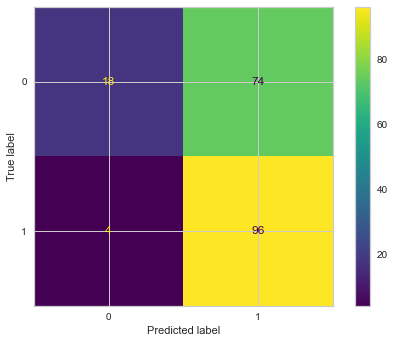

Accuracy on Train data :  0.6339285714285714
Presion : 0.9954545454545455
Recall : 0.5732984293193717
F1 score :  0.7275747508305648
Accuracy on Test data :  0.59375
Presion : 0.96
Recall : 0.5647058823529412
F1 score :  0.711111111111111


In [21]:
modelSVM=SVC(kernel='rbf')
modelSVM.fit(X_train, Y_train)

## produce a confusion matrix ##
plot_confusion_matrix(modelSVM, X_test, Y_test)  
plt.show() 

# accuracy on training data
X_train_prediction = modelSVM.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('Accuracy on Train data : ', train_data_accuracy)

print('Presion :',precision_score(X_train_prediction,Y_train))

print('Recall :',recall_score(X_train_prediction,Y_train))

print('F1 score : ', f1_score(X_train_prediction,Y_train))

# accuracy on test data
X_test_prediction = modelSVM.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

print('Presion :',precision_score(X_test_prediction,Y_test))

print('Recall :',recall_score(X_test_prediction,Y_test))

print('F1 score : ', f1_score(X_test_prediction,Y_test))  

In [26]:
from sklearn import svm
model_svm_r = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')
model_svm_r.fit(X_train, Y_train)
joblib.dump(model_svm_r,"model_svm_r")
y_pred7 = model_svm_r.predict(X_test)
print("SVM RBF kernel")
print("Train Accuracy:",model_svm_r.score(X_train, Y_train))
print("Test Accuracy:",model_svm_r.score(X_test, Y_test))
print("Precision Score: ",metrics.precision_score(Y_test, y_pred7, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(Y_test, y_pred7, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(Y_test, y_pred7, pos_label='positive', average='micro'))
# print(plot_ROC_curve(model_svm_r,X_train, X_test, Y_train, Y_test))

SVM RBF kernel
Train Accuracy: 0.9888392857142857
Test Accuracy: 0.4947916666666667
Precision Score:  0.4947916666666667
Recall Score:  0.4947916666666667
F1 Score:  0.4947916666666667


C:\Users\rugve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\rugve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\rugve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


C:\Users\rugve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


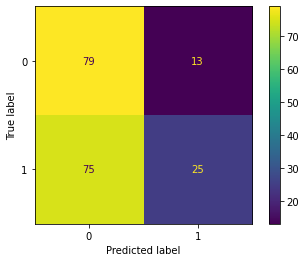

Accuracy on Train data :  0.5066964285714286
Accuracy on Test data :  0.5416666666666666


In [36]:
modelSVM=SVC(kernel='sigmoid')
modelSVM.fit(X_train, Y_train)

## produce a confusion matrix ##
plot_confusion_matrix(modelSVM, X_test, Y_test)  
plt.show() 

# accuracy on training data
X_train_prediction = modelSVM.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('Accuracy on Train data : ', train_data_accuracy)

# print('Presion :',precision_score(X_train_prediction,Y_train))

# print('Recall :',recall_score(X_train_prediction,Y_train))

# print('F1 score : ', f1_score(X_train_prediction,Y_train))

# accuracy on test data
X_test_prediction = modelSVM.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

# print('Presion :',precision_score(X_test_prediction,Y_test))

# print('Recall :',recall_score(X_test_prediction,Y_test))

# print('F1 score : ', f1_score(X_test_prediction,Y_test))  

C:\Users\rugve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


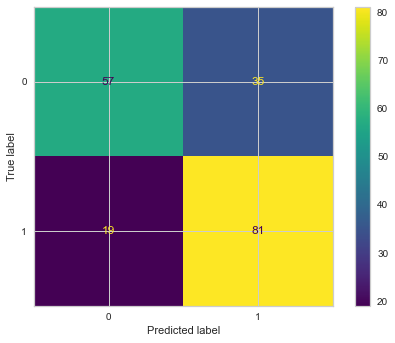

Accuracy on Train data :  0.9888392857142857
Presion : 0.9818181818181818
Recall : 0.9953917050691244
F1 score :  0.9885583524027459
Accuracy on Test data :  0.71875
Presion : 0.81
Recall : 0.6982758620689655
F1 score :  0.75


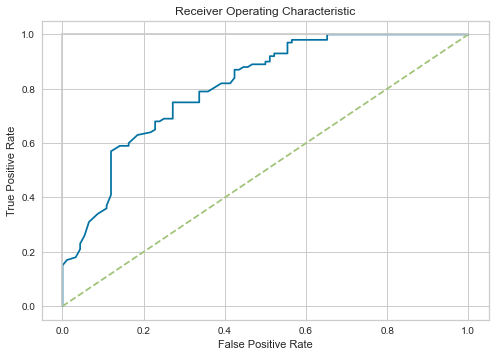

In [27]:
modelRF = RandomForestClassifier()
modelRF.fit(X_train,Y_train)

## produce a confusion matrix ##
plot_confusion_matrix(modelRF, X_test, Y_test)  
plt.show() 

# accuracy on training data
X_train_prediction = modelRF.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('Accuracy on Train data : ', train_data_accuracy)

print('Presion :',precision_score(X_train_prediction,Y_train))

print('Recall :',recall_score(X_train_prediction,Y_train))

print('F1 score : ', f1_score(X_train_prediction,Y_train))

# accuracy on test data
X_test_prediction = modelRF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

print('Presion :',precision_score(X_test_prediction,Y_test))

print('Recall :',recall_score(X_test_prediction,Y_test))

print('F1 score : ', f1_score(X_test_prediction,Y_test))

## produce a ROC plot ##
#obtain prediction probabilities
y_prob = modelRF.predict_proba(X_test)
#calculate false & true positive rates
fpr,tpr,_ = roc_curve(Y_test, y_prob[:,1])
#construct plot
plt.plot(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\Users\rugve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


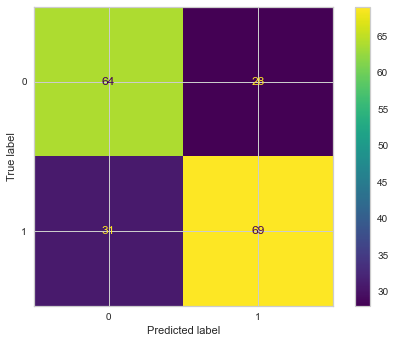

Accuracy on Train data :  0.9575892857142857
Presion : 0.9409090909090909
Recall : 0.971830985915493
F1 score :  0.956120092378753
Accuracy on Test data :  0.6927083333333334
Presion : 0.69
Recall : 0.711340206185567
F1 score :  0.700507614213198


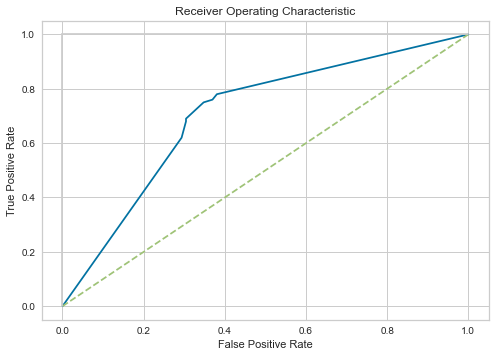

In [58]:
modelRF = DecisionTreeClassifier(max_depth=9)
modelRF.fit(X_train,Y_train)

## produce a confusion matrix ##
plot_confusion_matrix(modelRF, X_test, Y_test)  
plt.show() 

# accuracy on training data
X_train_prediction = modelRF.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('Accuracy on Train data : ', train_data_accuracy)

print('Presion :',precision_score(X_train_prediction,Y_train))

print('Recall :',recall_score(X_train_prediction,Y_train))

print('F1 score : ', f1_score(X_train_prediction,Y_train))

# accuracy on test data
X_test_prediction = modelRF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

print('Presion :',precision_score(X_test_prediction,Y_test))

print('Recall :',recall_score(X_test_prediction,Y_test))

print('F1 score : ', f1_score(X_test_prediction,Y_test))

## produce a ROC plot ##
#obtain prediction probabilities
y_prob = modelRF.predict_proba(X_test)
#calculate false & true positive rates
fpr,tpr,_ = roc_curve(Y_test, y_prob[:,1])
#construct plot
plt.plot(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\Users\rugve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


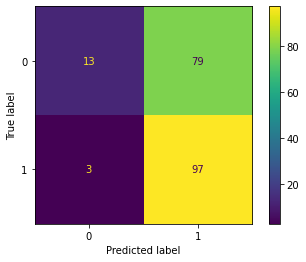

Accuracy on Train data :  0.546875
Accuracy on Test data :  0.5729166666666666


In [39]:
from sklearn.naive_bayes import GaussianNB
modelRF = GaussianNB()
modelRF.fit(X_train,Y_train)

## produce a confusion matrix ##
plot_confusion_matrix(modelRF, X_test, Y_test)  
plt.show() 

# accuracy on training data
X_train_prediction = modelRF.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('Accuracy on Train data : ', train_data_accuracy)

# print('Presion :',precision_score(X_train_prediction,Y_train))

# print('Recall :',recall_score(X_train_prediction,Y_train))

# print('F1 score : ', f1_score(X_train_prediction,Y_train))

# accuracy on test data
X_test_prediction = modelRF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

# print('Presion :',precision_score(X_test_prediction,Y_test))

# print('Recall :',recall_score(X_test_prediction,Y_test))

# print('F1 score : ', f1_score(X_test_prediction,Y_test))

## produce a ROC plot ##
#obtain prediction probabilities
# y_prob = modelRF.predict_proba(X_test)
# #calculate false & true positive rates
# fpr,tpr,_ = roc_curve(Y_test, y_prob[:,1])
# #construct plot
# plt.plot(fpr,tpr)
# plt.title('Receiver Operating Characteristic')
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

C:\Users\rugve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


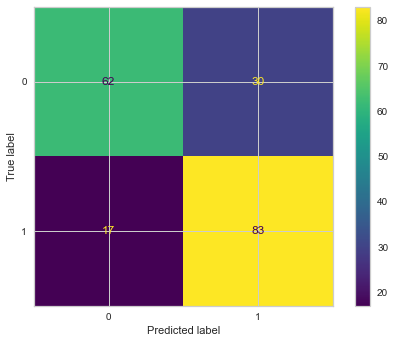


Results obtained for the XGB

Results obtained on Training Data
Accuracy on Train data :  0.984375
Presion : 0.9727272727272728
Recall : 0.9953488372093023
F1 score :  0.9839080459770115

Results obtained on Testing Data
Accuracy on Test data :  0.7552083333333334
Presion : 0.83
Recall : 0.7345132743362832
F1 score :  0.7793427230046949


In [59]:
modelXGB=XGBClassifier()
modelXGB.fit(X_train, Y_train)

## produce a confusion matrix ##
plot_confusion_matrix(modelXGB, X_test, Y_test)  
plt.show() 

# Accuracy on training data
X_train_prediction = modelXGB.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('\nResults obtained for the XGB')

print('\nResults obtained on Training Data')

print('Accuracy on Train data : ', train_data_accuracy)

print('Presion :',precision_score(X_train_prediction,Y_train))

print('Recall :',recall_score(X_train_prediction,Y_train))

print('F1 score : ', f1_score(X_train_prediction,Y_train))

# Accuracy on test data
X_test_prediction = modelXGB.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


print('\nResults obtained on Testing Data')

print('Accuracy on Test data : ', test_data_accuracy)

print('Presion :',precision_score(X_test_prediction,Y_test))

print('Recall :',recall_score(X_test_prediction,Y_test))

print('F1 score : ', f1_score(X_test_prediction,Y_test))

In [61]:
#knn
modelknn=KNeighborsClassifier()
modelknn.fit(X_train, Y_train)

# accuracy on training data
X_train_prediction = modelknn.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('\nResults obtained for the knn')

print('\nResults obtained on Training Data')

print('Accuracy on Train data : ', train_data_accuracy)

print('Presion :',precision_score(X_train_prediction,Y_train))

print('Recall :',recall_score(X_train_prediction,Y_train))

print('F1 score : ', f1_score(X_train_prediction,Y_train))

# Accuracy on test data
X_test_prediction = modelknn.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


print('\nResults obtained on Testing Data')

print('Accuracy on Test data : ', test_data_accuracy)

print('Presion :',precision_score(X_test_prediction,Y_test))

print('Recall :',recall_score(X_test_prediction,Y_test))

print('F1 score : ', f1_score(X_test_prediction,Y_test))


Results obtained for the knn

Results obtained on Training Data
Accuracy on Train data :  0.84375
Presion : 0.9136363636363637
Recall : 0.7976190476190477
F1 score :  0.8516949152542372

Results obtained on Testing Data
Accuracy on Test data :  0.765625
Presion : 0.89
Recall : 0.7235772357723578
F1 score :  0.7982062780269058


In [62]:
# from sklearn.neighbors import KNeighborsClassifier
# model_knn = KNeighborsClassifier(n_neighbors = 5)
# model_knn.fit(X_train, Y_train)
# #joblib.dump(model_knn,"model_knn")
# y_pred3 = model_knn.predict(X_test)
# print("KNN")
# print("Train Accuracy:",model_knn.score(X_train, Y_train))
# print("Test Accuracy:",model_knn.score(X_test, Y_test))
# print("Precision Score: ",metrics.precision_score(Y_test, y_pred3, pos_label='positive', average='micro'))
# print("Recall Score: ",metrics.recall_score(Y_test, y_pred3, pos_label='positive', average='micro'))
# print("F1 Score: ",metrics.f1_score(Y_test, y_pred3, pos_label='positive', average='micro'))
# print(plot_ROC_curve(model_knn,X_train, X_test, Y_train, Y_test))

In [41]:
from sklearn import svm
#create a classifier
modelsvm = svm.SVC(kernel="linear")
#train the model
modelsvm.fit(X_train,Y_train)
#predict the response
# pred = modelsvm.predict(X_test)

# #knn
# modelknn=KNeighborsClassifier()
# modelknn.fit(X_train, Y_train)

# accuracy on training data
X_train_prediction = modelsvm.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('\nResults obtained for the knn')

print('\nResults obtained on Training Data')

print('Accuracy on Train data : ', train_data_accuracy)

# Accuracy on test data
X_test_prediction = modelsvm.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


print('\nResults obtained on Testing Data')

print('Accuracy on Test data : ', test_data_accuracy)



Results obtained for the knn

Results obtained on Training Data
Accuracy on Train data :  0.7589285714285714

Results obtained on Testing Data
Accuracy on Test data :  0.7552083333333334


C:\Users\rugve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


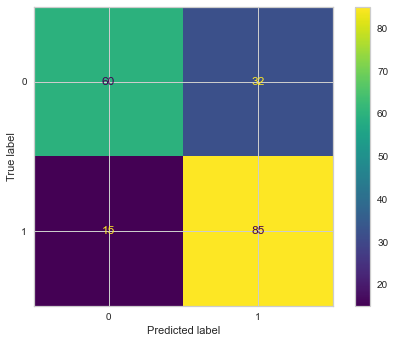

Accuracy on Train data :  0.7589285714285714
Presion : 0.7909090909090909
Recall : 0.7372881355932204
F1 score :  0.7631578947368423
Accuracy on Test data :  0.7552083333333334
Presion : 0.85
Recall : 0.7264957264957265
F1 score :  0.7834101382488479


In [63]:
modelSVM=SVC(kernel='linear')
modelSVM.fit(X_train, Y_train)

## produce a confusion matrix ##
plot_confusion_matrix(modelSVM, X_test, Y_test)  
plt.show() 

# accuracy on training data
X_train_prediction = modelSVM.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('Accuracy on Train data : ', train_data_accuracy)

print('Presion :',precision_score(X_train_prediction,Y_train))

print('Recall :',recall_score(X_train_prediction,Y_train))

print('F1 score : ', f1_score(X_train_prediction,Y_train))

# accuracy on test data
X_test_prediction = modelSVM.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

print('Presion :',precision_score(X_test_prediction,Y_test))

print('Recall :',recall_score(X_test_prediction,Y_test))

print('F1 score : ', f1_score(X_test_prediction,Y_test))   

In [42]:
joblib.dump(modelsvm,'model_svm')

['model_svm']

In [43]:
joblib.dump(modelknn,'model_knn')

['model_knn']

In [ ]:
# Prediction

In [3]:
loaded_svm = joblib.load('model_svm')

Predicted Activity: Chit-Chatting


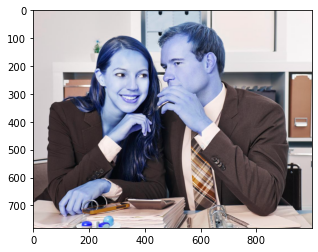

In [18]:
#assigning path with any class image
path = r'.\test\test-chit-6.jpg'

input_image = cv2.imread(path)
plt.imshow(input_image)

data=[]
   
#resize image
resize=(500,500)
img=cv2.resize(input_image,resize)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Initiate FAST detector
star = cv2.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kp = star.detect(img,None)
# compute the descriptors with BRIEF
keypoints, descriptors = brief.compute(gray, kp)

out=pd.DataFrame(descriptors)
# print('descriptor shape: ', out.shape)
out = out.astype(np.uint8)
hist=np.histogram(input_image,bins=[0,1,2,3,4,5])
#append the dataframe into the array 
data.append(hist[0])

#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)

pred = loaded_svm.predict(Output)
if(pred[0] == 1):
    print("Predicted Activity: Studying")
elif pred[0]==0 :
    print("Predicted Activity: Chit-Chatting")
# print(pred[0])

In [11]:
pred = loaded_svm.predict(Output)
if(pred[0] == 1):
    print("Activity: Studying")
elif pred[0]==0 :
    print("Activity: Chit-Chatting")
# print(pred[0])

Activity: Studying
